# Project 3: GDP and life expectancy
by Michel Wermelinger, 27 August 2015, updated 5 April 2016 modified by Ivaana Gramatikova, 10 January 2018
This is the project notebook for Week 3 of The Open University's Learn to code for Data Analysis course.
Richer countries can afford to invest more on healthcare, on work and road safety, and other measures that reduce mortality. On the other hand, richer countries may have less healthy lifestyles. Is there any relation between the wealth of a country and the life expectancy of its inhabitants?
The following analysis checks whether there is any correlation between the total gross domestic product (GDP) of a country in 2013 and the life expectancy of people born in that country in 2013.

In [17]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = read_csv('WB LE 2013.csv')

POP_INDICATOR = 'SP.POP.TOTL'
popReset = read_csv('WB POP 2013.csv')
popReset.head()

,country,year,SP.POP.TOTL
0,Arab World,2013,377096710
1,Caribbean small states,2013,6975819
2,Central Europe and the Baltics,2013,103713726
3,East Asia & Pacific (all income levels),2013,2248867116
4,East Asia & Pacific (developing only),2013,2006072847


# Cleaning the data

In [18]:
GDPCountries = gdpReset[34:].dropna()
LIFECountries = lifeReset[34:].dropna()
POPCountries = popReset[34:].dropna()

def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

COUNTRY = 'country'
GDP = 'GDP (GBP)'
GDP_CAPITA ='GDP (GBP) per capita'
GDPCountries[GDP] = GDPCountries[GDP_INDICATOR].apply(usdToGBP)
GdpVsPop = merge(GDPCountries, POPCountries, on=COUNTRY, how='inner')
GdpPerCapita = GdpVsPop[GDP] / GdpVsPop[POP_INDICATOR]
GdpVsPop[GDP_CAPITA] = GdpPerCapita

POP = 'Population in millions'
GdpVsPop[POP] = GdpVsPop[POP_INDICATOR].apply(roundToMillions)
GdpVsPop[GDP_CAPITA] = GdpVsPop[GDP_CAPITA].round()
GdpVsPop.head()

,country,year_x,NY.GDP.MKTP.CD,GDP (GBP),year_y,SP.POP.TOTL,GDP (GBP) per capita,Population in millions
0,Afghanistan,2013,2.045894e+10,1.307474e+10,2013,30682500,426,31
1,Albania,2013,1.278103e+10,8.168003e+09,2013,2897366,2819,3
2,Algeria,2013,2.097035e+11,1.340157e+11,2013,38186135,3510,38
3,Andorra,2013,3.249101e+09,2.076410e+09,2013,75902,27356,0
4,Angola,2013,1.383568e+11,8.842001e+10,2013,23448202,3771,23


In [19]:
headings = [COUNTRY, GDP, POP, GDP_CAPITA]
GdpVsPopClean = GdpVsPop[headings]
GdpVsPopClean.head()

,country,GDP (GBP),Population in millions,GDP (GBP) per capita
0,Afghanistan,1.307474e+10,31,426
1,Albania,8.168003e+09,3,2819
2,Algeria,1.340157e+11,38,3510
3,Andorra,2.076410e+09,0,27356
4,Angola,8.842001e+10,23,3771


In [22]:
LIFE = 'Life expectancy (years)'
LIFECountries[LIFE] = LIFECountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = LIFECountries[headings]
lifeClean.head()

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76


In [24]:
gdpVsPopVsLife = merge(GdpVsPopClean, lifeClean, on=COUNTRY, how='inner')
gdpVsPopVsLife.sort(GDP_CAPITA, ascending = False).head(20)

,country,GDP (GBP),Population in millions,GDP (GBP) per capita,Life expectancy (years)
99,Luxembourg,3.949116e+10,1,72680,82
125,Norway,3.338189e+11,5,65717,81
136,Qatar,1.290194e+11,2,61400,78
100,"Macao SAR, China",3.279306e+10,1,57729,80
18,Bermuda,3.562004e+09,0,54799,81
162,Switzerland,4.377129e+11,8,54110,83
7,Australia,9.994779e+11,23,43219,82
161,Sweden,3.698580e+11,10,38525,82
46,Denmark,2.146501e+11,6,38228,80
147,Singapore,1.931570e+11,5,35775,82


# Calculating the correlation

In [25]:
from scipy.stats import spearmanr

gdpColumn = gdpVsPopVsLife[GDP_CAPITA]
lifeColumn = gdpVsPopVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.850251513887
It is statistically significant.


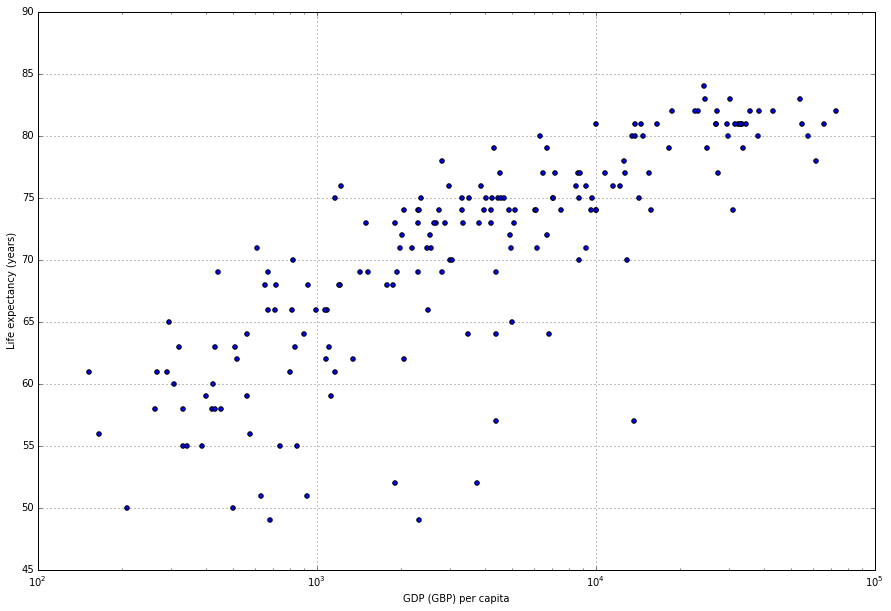

In [29]:
%matplotlib inline
gdpVsPopVsLife.plot(x=GDP_CAPITA, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(15, 10))

In [28]:
#richer countries tend to have longer life expectancy